In [0]:
from google.colab import files
uploaded = files.upload()

Saving images.zip to images.zip


In [0]:
!ls

images.zip  sample_data


In [0]:
!unzip images.zip -d images/

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
tensorflow 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.12.2 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.2 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
tfms = get_transforms(do_flip=True)
path = 'images/images/'

In [0]:
!mv images/images/zero images/images/0

In [0]:
#data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

data = (ImageList.from_folder(path) 
        .random_split_by_pct() 
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch())

In [0]:
!ls images/images/

0  1


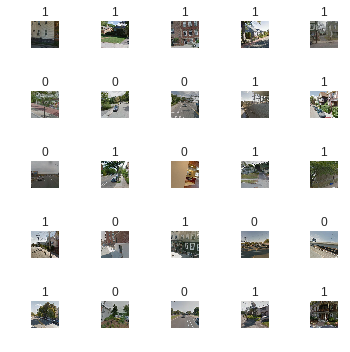

In [0]:
data.show_batch(ros=3, figsize=(5,5))

In [0]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 79795048.62it/s]


In [0]:
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
1,0.427957,0.393841,0.824400,08:20
2,0.409324,0.373483,0.840200,08:10


In [0]:
learn.save('84_accuracy')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


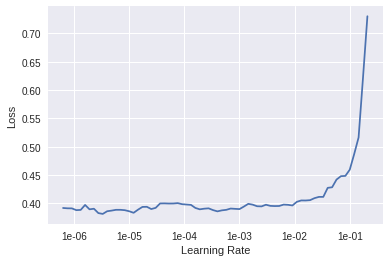

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=1e-6)

epoch,train_loss,valid_loss,accuracy,time
1,0.395808,0.367791,0.842800,08:34
2,0.399006,0.367995,0.842600,08:33
3,0.390391,0.368199,0.841400,08:37


In [0]:
learn.save('84.3_accuracy')

In [0]:
data.export()

In [0]:
learn.export()

In [0]:
!ls

data  images  images.zip  models


In [0]:
!cd models

In [0]:
!ls

data  images  images.zip  models


In [0]:
!ls models/

resnet50-19c8e357.pth


In [0]:
!ls data

In [0]:
ls images/

images/


In [0]:
ls images/images/

0/  1/  export.pkl  models/


In [0]:
files.download('images/images/export.pkl')

In [0]:
!ls images/images/models

84.3_accuracy.pth  84_accuracy.pth  tmp.pth


In [0]:
files.download('images/images/models/84_accuracy.pth')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 47290, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil